# Spectral Analysis

### Libraries Import

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Configuration Analysis

In [11]:
# Data Configuration
input_filename = "signal_data.csv"
output_filename = "frequency_data.csv"

# Noise threshold
THRESHOLD_MAGNITUDE = 40.0

### Data Processing

In [12]:
# Loading data
df = pd.read_csv(input_filename)
signal_x = df["signal_amplitude"].values
time_t = df["time_s"].values

# Extracting signal parameters
N = len(signal_x)
T_s = time_t[1] - time_t[0]
fs = 1.0 / T_s

print(f"Loaded signal with {N} samples.")
print(f"Derived sampling rate: {fs:.2f} Hz")

Loaded signal with 256 samples.
Derived sampling rate: 1000.00 Hz


### Fourier Matrix Construction

In [13]:
def create_dft_matrix(n_samples):
    # Defining grid
    j = np.arange(n_samples).reshape(-1, 1)
    k = np.arange(n_samples).reshape(1, -1)

    # Calculating the exponent constant
    exponent_constant = -2j * np.pi / n_samples

    # Creating the matrix
    F = np.exp(exponent_constant * j * k)

    return F

F_matrix = create_dft_matrix(N)
print(f"DFT Matrix Shape: {F_matrix.shape}")

DFT Matrix Shape: (256, 256)


### Performing the Transformation

In [14]:
# Matrix multiplication
X_complex = np.dot(F_matrix, signal_x)

# Calculating frequency bins
freq_bins = np.arange(N) * (fs / N)

# Calculating magnitudes
X_magnitude = np.abs(X_complex)

### Visualizing the Raw Spectrum

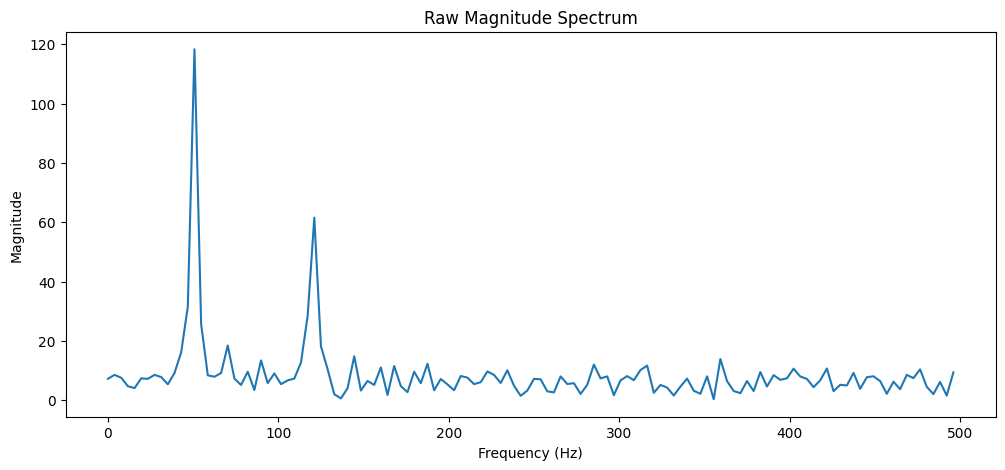

In [15]:
# Visualization of the Raw Spectrum
plt.figure(figsize=(12, 5))

# Plotting 0 to Nyquist
half_N = N // 2
plt.plot(freq_bins[:half_N], X_magnitude[:half_N])
plt.title("Raw Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### Threshold Filtering

In [16]:
# Creating copy
X_filtered = X_complex.copy()

# Identifying noise indices
noise_indices = np.abs(X_filtered) < THRESHOLD_MAGNITUDE

# Applying Filter
X_filtered[noise_indices] = 0.0 + 0.0j

# Counting remaining components
non_zero_count = np.count_nonzero(X_filtered)
print(f"Original Non-Zero Components: {N}")
print(f"Remaining Significant Components: {non_zero_count}")

Original Non-Zero Components: 256
Remaining Significant Components: 4


### Visualizing the Filtered Spectrum

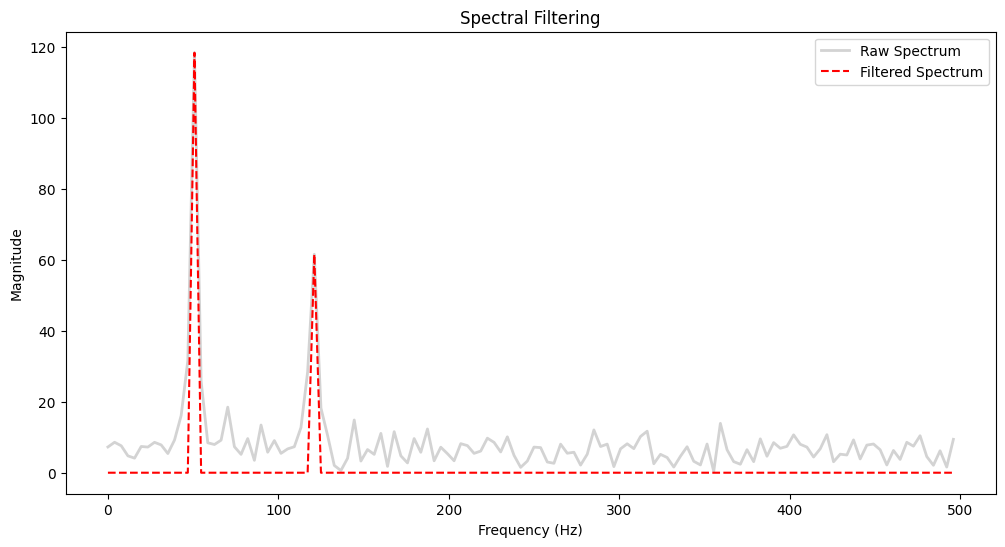

In [17]:
plt.figure(figsize=(12, 6))

# Plotting original spectrum
plt.plot(freq_bins[:half_N], np.abs(X_complex[:half_N]),
         label="Raw Spectrum", color="lightgray", linewidth=2)

# Plotting filtered spectrum
plt.plot(freq_bins[:half_N], np.abs(X_filtered[:half_N]),
         label="Filtered Spectrum", color="red", linestyle="--", linewidth=1.5)

plt.title("Spectral Filtering")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

### Data Export

In [18]:
# Preparing dataframe
df_freq = pd.DataFrame({
    "frequency_hz": freq_bins,
    "X_real": X_filtered.real,
    "X_imag": X_filtered.imag
})

# Saving to CSV
df_freq.to_csv(output_filename, index=False)

print(f"Frequency data saved to '{output_filename}'")

Frequency data saved to 'frequency_data.csv'
